In [45]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [46]:
num_classes = 10
input_shape= (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [47]:
print("x Train: ",x_train.shape)
print("x Test: ",x_test.shape)
print("y Train: ",y_train.shape)
print("y Test: ",y_test.shape)

x Train:  (60000, 28, 28)
x Test:  (10000, 28, 28)
y Train:  (60000,)
y Test:  (10000,)


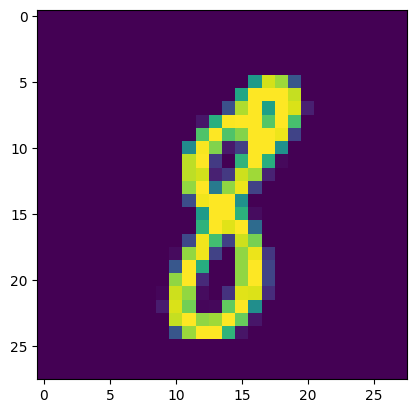

Label:  8


In [48]:
sample= x_train[300]
plt.imshow(sample)
plt.show()
print("Label: ",y_train[300])

In [49]:
x_train[300]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 138, 238, 217,  68,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [50]:
x_train = x_train/255
x_test = x_test/255

In [51]:
x_train[300]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [52]:
x_train.shape

(60000, 28, 28)

In [53]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [54]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [55]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3),activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3),activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(num_classes,activation="softmax"),
        ]
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)        │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 10)                │     16,010 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
batch_size = 120
epochs = 15

In [57]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [58]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8340 - loss: 0.6172 - val_accuracy: 0.9795 - val_loss: 0.0740
Epoch 2/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9740 - loss: 0.0837 - val_accuracy: 0.9845 - val_loss: 0.0593
Epoch 3/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9823 - loss: 0.0565 - val_accuracy: 0.9837 - val_loss: 0.0578
Epoch 4/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9856 - loss: 0.0476 - val_accuracy: 0.9880 - val_loss: 0.0430
Epoch 5/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9878 - loss: 0.0378 - val_accuracy: 0.9882 - val_loss: 0.0453
Epoch 6/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9906 - loss: 0.0302 - val_accuracy: 0.9867 - val_loss: 0.0461
Epoch 7/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9917 - loss: 0.0275 - val_accuracy: 0.9865 - val_loss: 0.0444
Epoch 8/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9920 - loss: 0.0250 - val_accu

In [59]:
print(history.history) 

{'accuracy': [0.9250555634498596, 0.9764074087142944, 0.9826481342315674, 0.9857592582702637, 0.9877592325210571, 0.9900000095367432, 0.9911481738090515, 0.9921296238899231, 0.9928703904151917, 0.9936481714248657, 0.9945555329322815, 0.9948148131370544, 0.9955925941467285, 0.9963889122009277, 0.9970555305480957], 'loss': [0.2715453505516052, 0.07699842751026154, 0.05613640695810318, 0.046965353190898895, 0.03813229873776436, 0.033270951360464096, 0.02824920415878296, 0.025442134588956833, 0.02283608540892601, 0.02013445273041725, 0.01703774556517601, 0.01568680629134178, 0.013024479150772095, 0.011079695075750351, 0.009493986144661903], 'val_accuracy': [0.9794999957084656, 0.984499990940094, 0.9836666584014893, 0.9879999756813049, 0.9881666898727417, 0.9866666793823242, 0.9865000247955322, 0.9903333187103271, 0.9901666641235352, 0.9883333444595337, 0.9881666898727417, 0.9884999990463257, 0.9903333187103271, 0.9871666431427002, 0.9848333597183228], 'val_loss': [0.07398855686187744, 0.05

In [60]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9809 - loss: 0.0647
Test loss: 0.05246506258845329
Test accuracy: 0.9848999977111816


In [61]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [62]:
y_pred

array([[1.0778003e-12, 4.3161828e-12, 7.3519448e-07, ..., 9.9994087e-01,
        2.1875877e-10, 1.1782270e-08],
       [7.7647009e-09, 4.3763046e-07, 9.9999952e-01, ..., 3.3795663e-13,
        3.0439297e-11, 2.3940849e-14],
       [1.1297498e-09, 9.9966741e-01, 8.1310247e-08, ..., 1.2352056e-05,
        1.2537263e-06, 1.5447103e-08],
       ...,
       [6.1600072e-21, 6.4134726e-14, 8.9417986e-19, ..., 1.1106292e-12,
        7.5728408e-12, 3.1445809e-13],
       [6.1379929e-08, 2.7301369e-15, 1.5903309e-12, ..., 2.2996833e-13,
        4.6515374e-06, 1.2048101e-12],
       [5.4552389e-09, 7.8949304e-12, 3.1564817e-11, ..., 6.4981479e-15,
        8.7549541e-09, 1.1717578e-14]], dtype=float32)

In [63]:
y_pred_classes = np.argmax(y_pred,axis = 1)

In [64]:
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

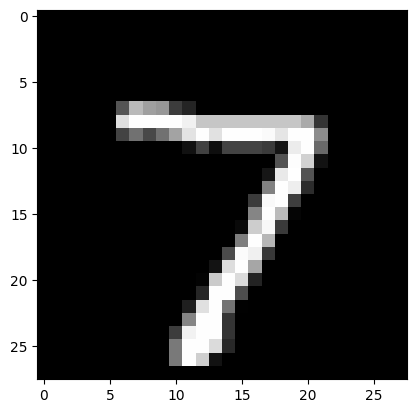

In [65]:
plt.imshow(image, cmap='gray')
plt.show()

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_classes)
report = classification_report(y_test, y_pred_classes)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[ 975    0    1    2    0    0    0    1    1    0]
 [   0 1130    1    3    0    0    1    0    0    0]
 [   1    4 1014    7    2    0    0    3    1    0]
 [   0    0    0 1009    0    1    0    0    0    0]
 [   0    0    0    2  978    0    0    0    1    1]
 [   1    0    0   22    0  866    1    1    1    0]
 [   4    2    0    1    2    6  942    0    1    0]
 [   0    2    3   12    0    1    0 1008    1    1]
 [   2    0    0   13    2    2    0    1  953    1]
 [   1    0    0   18    9    5    0    2    0  974]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.93      1.00      0.96      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.97      0.98       892
           6       1.00      0.98      0.99     

In [69]:
model.save('mnist_t1.h5')

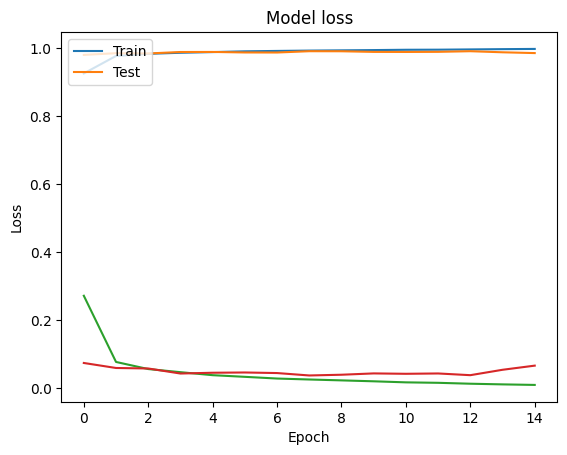

In [72]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [78]:
import tensorflow as tf
mn_model=tf.keras.models.load_model('C:\\Users\\acer\\Desktop\\SEM 6 PPTS\\MLL\\avengers\\mnist_t1.h5')

In [80]:
import cv2 as cv

In [83]:
image=cv.imread('C:\\Users\\acer\\Desktop\\SEM 6 PPTS\\MLL\\avengers\\number-2-number-two-svg-png-icon-download-6.png')

In [84]:
image.shape

(980, 980, 3)

In [87]:
gray_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [88]:
gray_img.shape

(980, 980)

In [89]:
img=cv.resize(gray_img,(28,28))

In [91]:
img.shape

(28, 28)

In [94]:
6000,28,28,1
1,28,28,1

(1, 28, 28, 1)

In [96]:
img=np.expand_dims(img,-1)

In [97]:
img.shape

(28, 28, 1)

In [99]:
img=np.expand_dims(img,0)

In [100]:
img.shape

(1, 1, 28, 28, 1)

In [102]:
img = img.reshape((1, 28, 28, 1))

In [103]:
img.shape

(1, 28, 28, 1)

In [104]:
pred=mn_model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
